# Dataset preprocessing

We preprocess the data as follows: 
we keep the metadata and merge the opinions into a big text. The latter text is stripped of symbols with a regex and lowered.

In [1]:
import sys
sys.path.append("..")

import json
from pprint import pprint
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 90

from src.dataset import Dataset

In [2]:
dataset = Dataset(dataset_path="../data/raw/data.jsonl")

In [3]:
dataset.partition_save()

Saving documents from 1760 to 1779
Saving documents from 1800 to 1819
Saving documents from 1820 to 1839
Saving documents from 1840 to 1859
Saving documents from 1860 to 1879
Saving documents from 1880 to 1899
Saving documents from 1900 to 1919
Saving documents from 1920 to 1939
Saving documents from 1940 to 1959
Saving documents from 1960 to 1979
Saving documents from 1980 to 1999
Saving documents from 2000 to 2019


### Merge data with tokenized text
Run after tokenization

In [4]:
dataset.merge_tokens_data()

Processing 1760.json
Processing 1800.json
Processing 1820.json
Processing 1840.json
Processing 1860.json
Processing 1880.json
Processing 1900.json
Processing 1920.json
Processing 1940.json
Processing 1960.json
Processing 1980.json
Processing 2000.json


### Dataset distributions study

Here is the first document in the dataset.

In [3]:
data = dataset.load_dataset(year=None)

In [4]:
data[0]

{'id': 2747110,
 'name': 'The People of the State of Illinois, Plaintiff-Appellee, v. Danny Tobin, Defendant-Appellant',
 'decision_date': 1771,
 'court': 'Illinois Appellate Court',
 'text': 'mr presiding justice eberspacher delivered the opinion of the court defendant tobin was convicted by a jury of the crime of burglary the court entered judgment upon the verdict and sentenced the defendant to a fifteen to twenty five year term in the illinois state penitentiary the judgment of the court further provided that the mittimus was to be effective upon release by federal authorities the defendant has appealed from that judgment and raised the following issues  the state failed to prove lack of authority to enter the premises  the state failed to prove intent to commit a theft  the court erred in allowing testimony concerning the arrest of sherri tobin her possession of a firearm and evidence concerning defendant s possession of a firearm  the sentence was excessive the facts giving rise 

In [5]:
courts_counts = defaultdict(lambda:0)
years_count = defaultdict(lambda:0)

for doc in data:
    courts_counts[doc["court"]] += 1
    years_count[doc["decision_date"]//10*10] += 1

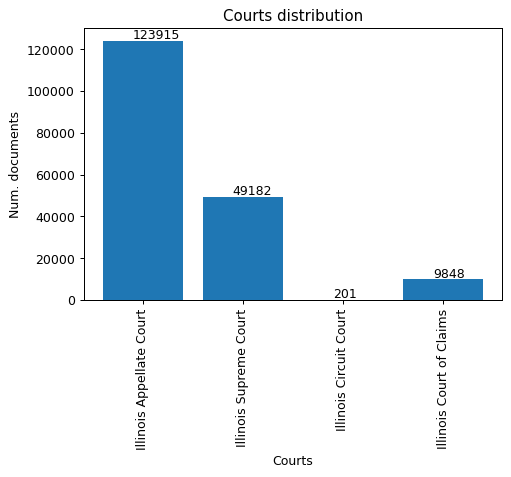

In [6]:
x, y = list(courts_counts.keys()), list(courts_counts.values())
plt.bar(x, y)
plt.title("Courts distribution")
plt.xlabel("Courts")
plt.ylabel("Num. documents")
for i, v in enumerate(y):
    plt.text(i-0.1, v+1000, v)
plt.xticks(x, rotation='vertical')
plt.show()


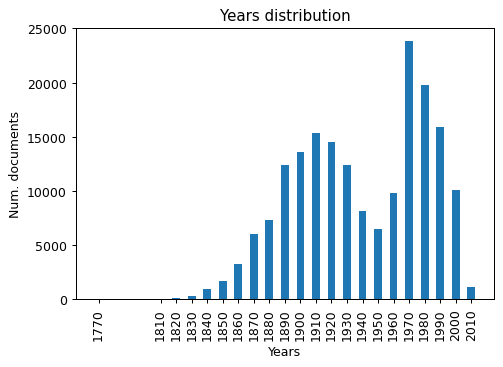

In [7]:
x, y = list(years_count.keys()), list(years_count.values())
plt.bar(x, y, width=5)
plt.title("Years distribution")
plt.xlabel("Years")
plt.ylabel("Num. documents")
plt.xticks(x, rotation='vertical')
plt.show()

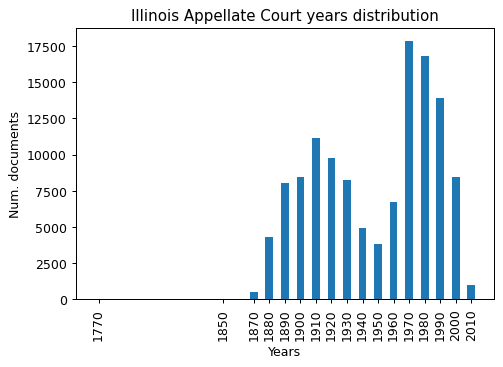

In [8]:
app_years_count = defaultdict(lambda:0)

for doc in data:
    if doc["court"] == "Illinois Appellate Court":
        app_years_count[doc["decision_date"]//10*10] += 1

x, y = list(app_years_count.keys()), list(app_years_count.values())
plt.bar(x, y, width=5)
plt.title("Illinois Appellate Court years distribution")
plt.xlabel("Years")
plt.ylabel("Num. documents")
plt.xticks(x, rotation='vertical')
plt.show()